In [67]:
#Importing the data + all dependencies

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
#Read in data
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [69]:
#Rename column

#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
df.rename(columns={'male': 'Sex'}, inplace=True)

df.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [70]:
df.info()
#Glucose has the the most NonNull Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [71]:
df.value_counts()

Sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
0    32   2.0        1              15.0        0.0     0                0             0         242.0    111.0  70.0   29.84  80.0       88.0     0             1
1    42   2.0        0              0.0         0.0     0                0             0         240.0    132.0  89.5   29.35  75.0       103.0    0             1
                                                                         1             0         249.0    142.5  90.0   26.14  59.0       82.0     0             1
                     1              5.0         0.0     0                0             0         200.0    131.0  88.0   25.09  81.0       88.0     0             1
                                                                                                 355.0    113.0  81.0   26.17  90.0       71.0     0             1
                           

In [72]:
df.dtypes

Sex                  int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [73]:
df.isnull().values.any()
#if df.isnull

True

In [74]:
#Filling NA with float values 
df['cigsPerDay'].fillna(0.0, inplace=True)

In [75]:
#Dropping all na rows by default
df.dropna(inplace=True)

In [99]:
#Dropping education 
df.drop('education',axis=1,inplace=True)

In [100]:
df

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Axes: xlabel='TenYearCHD', ylabel='count'>

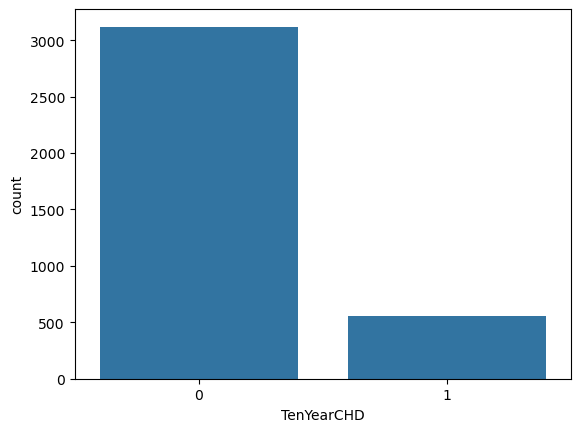

In [102]:
#Countplots 
sns.countplot(data=df, x=df['TenYearCHD'])

<Axes: xlabel='Sex', ylabel='count'>

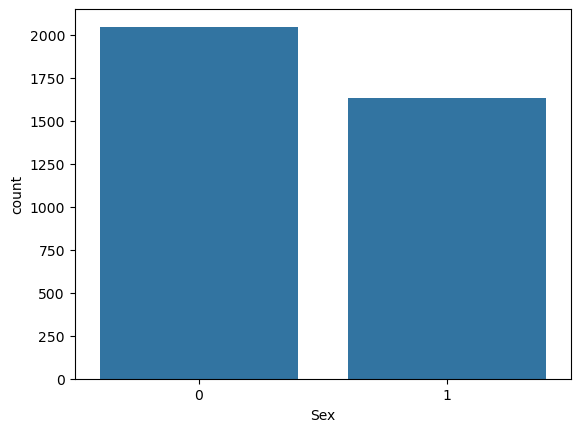

In [103]:
#Countplots 
sns.countplot(x=df['Sex'],data=df,)

In [104]:
#Grouping and training test creation

y=df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=82)

In [105]:
#Model training 
from sklearn.linear_model import LogisticRegression



In [106]:

#Training
lgR = LogisticRegression(max_iter = 5000)
lgR.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [107]:
# Predictions
predictions = lgR.predict(X_test)

In [108]:
#Check precision
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       941
           1       0.74      0.10      0.18       163

    accuracy                           0.86      1104
   macro avg       0.80      0.55      0.55      1104
weighted avg       0.85      0.86      0.82      1104



In [110]:
#Confusion metrics 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 17 146]
 [  6 935]]


## Interpretations

- A confusion matrix shows the model’s ability to correctly predict or separate the classes. 
    - In the specific case of a binary classifier, such as this example, we can interpret these numbers as the count of true positives, false negatives, true negatives, and false positives. 
    
  + Thus the true positive count is 17
   - The classifier correctly predicted the count  
 
  + The false positive is 6
     -  The classifier falsely predicted the count of Yes or (1) by 159
 
  + The true negative is 146 
  
     - The classifier correctly predicted the count of No or (0), given 5
   
  
  + The false negative is 935.
    -  The classifier incorrectly precided the count fo No or (0) by 5 times 
  
  
  
### Precision - measure of the accuracy, provided that a class label has been predicted.

- For class 0 (negative class): 86% of the instances predicted as class 0 were actually class 0.
- For class 1 (positive class): 74% of the instances predicted as class 1 were actually class 1.

### Recall true - positive rate  or abaility of a model to find all the relevent cases*** 

- For class 0: 99% of the actual class 0 instances were correctly predicted as class 0.
- For class 1: Only 10% of the actual class 1 instances were correctly predicted as class 1.


